# Guide 3: Public Cloud Computing with Microsoft Azure

Any time you use an online service to send email, edit documents, play games, or store pictures and other files, it’s likely that cloud computing is making it all possible under the hood for you. In the previous guide we covered storage service and in this one we are going to show you how to use cloud computing services such as Computer Vision, Speech Recognition, and Text Analytics that will respectively allow to extract features and contents from images, to transcribe audio files to text, and to perform text analysis with Microsoft Azure.
Cloud computing services all work a little differently, depending on the provider. But many provide a friendly, browser-based dashboard that makes it easier for IT professionals and developers to order resources and manage their accounts. In the previous guides you familiarize with Azure Dashboard to create services and with Storage Explorer to manage your data. You also started  working with REST APIs and the SDK for Python that gave as more options for automating the processes. This guides is going to show you how to use the most interesting cloud computing services that we believe might be useful to social scientists for expanding datasources to use for quantitative research. We estimate that completing this guide will take you around 30-45 minutes for reading, running the code and understanding how it works.

# Table of Contents
* [Guide 3: Public Cloud Computing with Microsoft Azure](#Guide-3:-Public-Cloud-Computing-with-Microsoft-Azure)
    * [Azure cloud computing basics](#Azure-cloud-computing-basics)
    * [Common tasks in using Azure cloud computing services](#Common-tasks-in-using-Azur-cloud-computing-services)
        * [Set up containers, upload local files to cloud storage and retrieve list of BLOBs](#Set-up-containers,-upload-local-files-to-cloud-storage-and-retrieve-list-of-BLOBs)
        * [Use API request and response to use public cloud services](#Use-API-request-and-response-to-use-public-cloud-services)
    * [Captions generation](#Captions-generation)
        * [Demo 1: Face API to detect facial characteristics and emotion](#Demo-1:-Face-API-to-detect-facial-characteristics-and-emotion)
        * [Demo 2: Computer Vision API to analyze image contents](#Demo-2:-Computer-Vision-API-to-analyze-image-contents)
        * [Demo 3: Computer Vision API for optical character recognition](#Demo-3:-Computer-Vision-API-for-optical-character-recognition)
    * [Transcribe audio to text](#Transcribe-audio-to-text)
        * [Demo 4: Speech Recognition API to convert audio files to text](#Demo-4:-Speech-Recognition-API-to-convert-audio-files-to-text)
    * [Text analysis](#Text-analysis)
        * [Demo 5: Text Analytics API to extract key words from text](#Demo-5:-Text-Analytics-API-to-extract-key-words-from-text)
        * [Demo 6: Text Analytics API to perform sentiment analysis on text](#Demo-6:-Text-Analytics-API-to-perform-sentiment-analysis-on-text)   
    * [Recap](#Recap)
        * [What you have learnt](#What-you-have-learnt)
        * [What are you going to learn](#What-are-you-going-to-learn)

## Azure cloud computing basics

The first cloud computing services are barely a decade old, but already a variety of organizations are embracing the technology for all sorts of reasons. Here are a few of the things you can do with the cloud such as creating new apps and services, Store, back up, and recover data, host websites and blogs and most interestengly for the present guide delivering software on demand. We hope in further workshops to expand to services that allow for analyzing data for patterns and for making predictions.
Here are 6 common reasons that might makes you turning to cloud computing services [[What is cloud computing](https://azure.microsoft.com/en-us/overview/what-is-cloud-computing/)]:

- **Cost**: eliminates/reduces a) the capital expense of buying hardware and software and setting up and running on-site datacenters, b) electricity for power and cooling, and c) the IT experts for managing the infrastructure.
- **Speed**: vast amounts of computing resources can be provisioned in minutes, with just a few mouse clicks.
- **Global scale**: cloud computing services include the ability to scale elastically. This means delivering the right amount of IT resources (i.e. computing power, storage, bandwidth, and geographic location).
- **Productivity**: cloud computing removes the need for on-site datacenters that require a lot of “racking and stacking”—hardware set up, software patching, and other time-consuming IT management chores. In this way teams can spend time on achieving more important goals.
- **Performance**: cloud computing services run on a worldwide network of secure datacenters, which are regularly upgraded to the latest generation of fast and efficient computing hardware.
- **Reliability**: makes data backup, disaster recovery, and business continuity easier and less expensive, because data can be mirrored at multiple redundant sites on the cloud provider’s network.

## Common Tasks in using Azure Cloud Computing services 
### Set up containers, upload local files to cloud storage and retrieve list of BLOBs

You have learned in the previous guide how to use BLOB containers with SDK for Python. Now you are going to repeat the same procedure but using functions that we provide to avoid hard coding the whole procedure yourself. You will need a storage account as well as all the API keys for the others public cloud services (i.e. Face, Computer Vision, Speech Recognition, and Text Analytics) that we are going to use in this guide.

_**To create a container and upload files, do the following:**_

- import functions from utilities.py 
- set directories to import images for demos (~\public_cloud_computing\data\G3_demo)
- retrieve storage account service credentials from your azure_keys (~\public_cloud_computing\guides\keys)
- make sure you are logged in to Azure portal ([Link](https://portal.azure.com))
- create container, retrive files to download path and upload them. Use functions **`upload_files_to_container()`**
- retieve BLOB names and URLs using the function **`retrieve_blob_list `**

NOTE: The function upload_files_to_container() call three functions at once for you: to retrieve files name, path and extensions uses get_files(), to create containers use make_public_container(), and to upload files to containers uses the function use upload_file(). You can have a look on those function in the file \utilities\utils.py

In [2]:
#import library
import sys

#import functions from utilities
sys.path.insert(0, "../utilities/")
try:
    from utils import *
except ImportError:
    print('No Import')

In [3]:
#set local directory to upload files from, and directory to import azure keys from
cur_dir = os.getcwd()
os.chdir('../keys/')
dir_azure_keys = os.getcwd()
os.chdir('../../data/G3_demo/')
dir_files_demo = os.getcwd()

#print directories
print('------------------------------------------------------------------------------------------------------------------')
print('Your documents directories are:')
print('- notebook:\t', cur_dir)
print('- azure keys:\t', dir_azure_keys)
print('- files:\t', dir_files_demo)
print('------------------------------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------------------------------
Your documents directories are:
- notebook:	 C:\Users\popor\iqss_workshop\workshops\public_cloud_computing\guides\G3
- azure keys:	 C:\Users\popor\iqss_workshop\workshops\public_cloud_computing\guides\keys
- files:	 C:\Users\popor\iqss_workshop\workshops\public_cloud_computing\data\G3_demo
------------------------------------------------------------------------------------------------------------------


In [4]:
#retrive keys

#ERASE MY PATH BEFORE REALISING THE WORKSHOP MATERIALS
my_path_to_keys = 'C:/Users/popor/Desktop/'

#set service name, path to the keys and keys file name
SERVICE_NAME = 'STORAGE' #add here: STORAGE, FACE, COMPUTER_VISION, SPEECH_RECOGNITION, TEXT_ANALYTICS
PATH_TO_KEYS = my_path_to_keys #add here (use dir_azure_keys)
KEYS_FILE_NAME = 'azure_services_keys_v1.1.json' #add file name (eg 'azure_services_keys.json')

#call function to retrieve
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set storage name and keys
STORAGE_NAME = storage_keys['NAME']
STORAGE_KEY = storage_keys['API_KEY']

In [5]:
#set a name for a new container
NEW_CONTAINER_NAME ='mycloudcomputingservices'

#set the audio file directory
DIR_FILES = dir_files_demo

# #set content type of the file, in this case is a audio .wav
upload_files_to_container(STORAGE_NAME, STORAGE_KEY, NEW_CONTAINER_NAME, DIR_FILES)

mycloudcomputingservices BLOB container has been successfully created: True
------------------------------------------------------------------------------------------------------------------
Data stored from directory):	 C:\Users\popor\iqss_workshop\workshops\public_cloud_computing\data\G3_demo
------------------------------------------------------------------------------------------------------------------
Start uploading files
------------------------------------------------------------------------------------------------------------------
bill_clinton_hope_ad_1992_chunck_1.wav // BLOB upload status: successful
bill_clinton_hope_ad_1992_chunck_2.wav // BLOB upload status: successful
eisenhower_for_president_1952_frame100.jpg // BLOB upload status: successful
high_quality_famous_daisy_attack_ad_from_1964_presidential_election_frame900.jpg // BLOB upload status: successful
humphrey_laughing_at_spiro_agnew_1968_political_ad_frame500.jpg // BLOB upload status: successful
kennedy_for_me_c

In [7]:
#retrieve BLOB names and URLs
blob_name, blob_url = retrieve_blob_list(STORAGE_NAME, STORAGE_KEY, NEW_CONTAINER_NAME)

#import library to display image
from IPython.display import Image as ipImage, display

#display images 
for url, name in zip(blob_url[2:], blob_name[2:]):
    img = ipImage(url=url, width=200, height=200)
    print(url)
    display(img)

https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/eisenhower_for_president_1952_frame100.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/high_quality_famous_daisy_attack_ad_from_1964_presidential_election_frame900.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/humphrey_laughing_at_spiro_agnew_1968_political_ad_frame500.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/kennedy_for_me_campaign_jingle_jfk_1960_frame200.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/ronald_reagan_tv_ad_its_morning_in_america_again_frame1200.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/yes_we_can__barack_obama_music_video_frame1100.jpg


### Use API request and response to use public cloud services

This guide will show you how to use public cloud services with SDK for Python. Every time you request a service to the cloud you will use the API you have created in the first guide. What is an API? Think about your self in a restaurant. A waiter comes to your table to take your meal order, he delivers it to the kitchen and then, when it is ready, take your meal back to your table. This is what API does, he makes communication possible among two different softwares (you and the restaurant kitchen in this example). Now, in our example we did not mention if the waiter speak or not our same language. What if he does not? We need a common language. In the case of two softwares communitcating, this language is HTTP ([Hypertext Transfer Protocol](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol)). In the picture below you can se how the communication among the script and cloud service works.

![API_request_and_response](img/API_request_and_response.PNG)

The HTTP request that you will send to the cloud service contains two main "informations": headers, and parameters. These two components build up your message to the "kitchen" and all the services presented in this guide requires you to compile them. By doing so you will be able to change your request based on your need. For instance, by changing some parameters you will be able to add or remove variables that you would like the service to return to you. HTTP Headers represent the meta-data associated with the API request and response while REST parameters specify the variable parts of the data you are working with. In any RESTful service it is very desirable to have all your resources structured by their hierarchy.  The hierarchical parts are all 1) required, and 2) unique. This means that none of them can be omitted, and all of them can appear only once [[Understanding rest headers and parameters](https://www.soapui.org/learn/api/understanding-rest-headers-and-parameters.html)]. Certain parts of the URL are going to be fixed such as the server name, port, and endpoint, and certain parts are going to be parametrized. The parametrized parts are often denoted in code and in documentation by curly braces. Below is a schema of a generic API request:




<a><center>http://server:8080/order_api/{service_id}?option=opt_1&option=opt_2</center></a>


## Captions generation
### Demo 1: Face API to detect facial characteristics and emotion

_**Description:**_
Detect human faces in an image, return face rectangles, and optionally with faceIds, landmarks, and attributes. Attributes include age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure and noise. It can detects up to 64 faces for an image. Faces are ranked by face rectangle size from large to small. Face detector prefer frontal and near-frontal faces. There are cases that faces may not be detected, e.g. exceptionally large face angles (head-pose) or being occluded, or wrong image orientation.

_**Input/Output:**_
JPEG, PNG, GIF (the first frame), and BMP format are supported. The allowed image file size is from 1KB to 6MB.
Faces are detectable when its size is 36x36 to 4096x4096 pixels. If need to detect very small but clear faces, please try to enlarge the input image. Higher face image quality means better detection and recognition precision. Please consider high-quality faces: frontal, clear, and face size is 200x200 pixels (100 pixels between eyes) or bigger.

A succesfull response returns:
![face_detect_output](img/face_detect_output.PNG)

_**Request URL:**_  https://[location].api.cognitive.microsoft.com/face/v1.0/detect[?returnFaceId][&returnFaceLandmarks][&returnFaceAttributes]

_**Documentation:**_ [FACE doc](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236)

_**How to use the service:**_
- make sure you are logged in to Azure portal ([Link](https://portal.azure.com))
- import libraries
- retrieve service key
- configure API access to request face service (from dashboard go to service>overview>endpoint)
- set request headers
- set request parameters
- send request
- extract response (i.e. age, gender, smile, emotions/happiness) from FACE response
- display image - optional

In [8]:
#import library
import requests
import urllib
import json

In [9]:
#set service name
SERVICE_NAME = 'FACE'

#call function to retrive keys
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set text analytics keys
FACE_KEY = storage_keys['API_KEY']

In [10]:
#configure API access to request face service
URI_FACE = 'https://eastus.api.cognitive.microsoft.com/face/v1.0/detect'

#set REST headers
headers = {}
headers['Content-Type'] = 'application/json'
headers['Accept'] = 'application/json'
headers['Ocp-Apim-Subscription-Key'] = FACE_KEY

#set REST api request parameters
params_set = {}
params_set['returnFaceId'] = 'true'
params_set['returnFaceLandmarks'] = 'true'
params_set['returnFaceAttributes'] = 'gender,smile,age,emotion'

In [11]:
#set blob to use with FACE service
BLOB_URL = 'https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/yes_we_can__barack_obama_music_video_frame1100.jpg' #add here BLOB url

#set a FACE request 
params = urllib.parse.urlencode(params_set)
query_string = '?{0}'.format(params) 
url = URI_FACE + query_string
body = '{\'url\':\'' + BLOB_URL + '\'}'

#request for FACE service   
api_response = requests.post(url, headers=headers, data=body)
print('{} had a {} response'.format(BLOB_URL.split('/')[-1], api_response))

#extract data from response in json format
response = json.loads(api_response.content.decode('utf-8'))

yes_we_can__barack_obama_music_video_frame1100.jpg had a <Response [200]> response


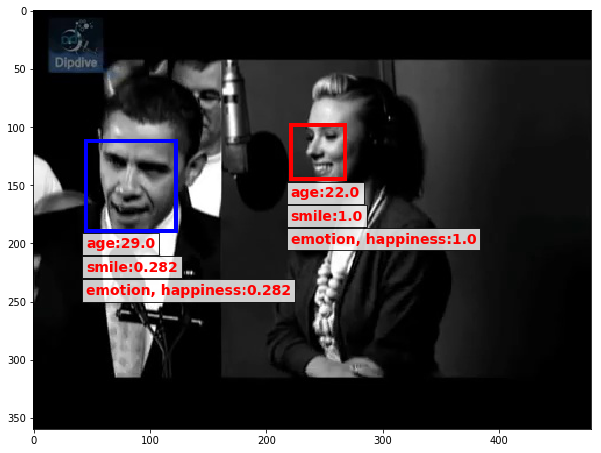

In [12]:
#extract age, gender, smile and emotions (i.e. happiness) from FACE response
#import libraries to display image
import io
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# set image's name to read
blob_name = 'yes_we_can__barack_obama_music_video_frame1100.jpg'

#create blob service
blob_service = BlockBlobService(account_name= STORAGE_NAME, account_key=STORAGE_KEY)

#call method (i.e. get_blob_to_bytes to) read the images as byte array
blob = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, blob_name)

#set variable that store in memory image's bytes 
blob_bytes_in_memory = io.BytesIO(blob.content)

#read bytes and display image in the notebook
img_bytes = Image.open(blob_bytes_in_memory)

#define figure size
plt.figure(figsize=(10, 10))
ax = plt.gca()

#draw face rectangles
for i in response:
    #extract face rectangle dimensions
    face_rectangle = i['faceRectangle']
    
    #set red frame for female and blu for male
    frame_color = 'red'
    if i['faceAttributes']['gender'] == 'male':
        frame_color = 'blue'

    #draw rectangle
    ax.add_patch(patches.Rectangle((face_rectangle['left'], face_rectangle['top']), face_rectangle['width'],face_rectangle['height'],
            fill=False, linewidth=4, color=frame_color))
    
    #add text 
    ax.text(face_rectangle['left'], face_rectangle['top']+face_rectangle['height']+15, 'age:'+str(i['faceAttributes']['age']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
    ax.text(face_rectangle['left'], face_rectangle['top']+face_rectangle['height']+35, 'smile:'+str(i['faceAttributes']['smile']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
    ax.text(face_rectangle['left'], face_rectangle['top']+face_rectangle['height']+55, 'emotion, happiness:'+str(i['faceAttributes']['emotion']['happiness']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))

plt.imshow(img_bytes);

In [13]:
#extract emotions from FACE response
print('The first face has the following emotions confidences:\n', json.dumps(response[0]['faceAttributes']['emotion'],indent=1, sort_keys=True))
print('----------------------------------')
print('The second face following emotions confidences:\n', json.dumps(response[1]['faceAttributes']['emotion'],indent=1, sort_keys=True))

The first face has the following emotions confidences:
 {
 "anger": 0.017,
 "contempt": 0.006,
 "disgust": 0.005,
 "fear": 0.0,
 "happiness": 0.282,
 "neutral": 0.684,
 "sadness": 0.005,
 "surprise": 0.001
}
----------------------------------
The second face following emotions confidences:
 {
 "anger": 0.0,
 "contempt": 0.0,
 "disgust": 0.0,
 "fear": 0.0,
 "happiness": 1.0,
 "neutral": 0.0,
 "sadness": 0.0,
 "surprise": 0.0
}


In [14]:
#################################################
#What could we use the output from FACE API for?#
#Can you think to any research example?         #
#################################################

### Demo 2: Computer Vision API to analyze image contents

_**Description:**_ The Analyze Image operation from the Computer Vision API extracts a rich set of visual features based on the image content.  For example, it can be used to describe an image with complete English sentences.

_**Input/Output:**_ Two input methods are supported: 1) uploading an image or 2) specifying an image URL. Within your request, there is an optional parameter to allow you to choose which features to return (find a complete list of parameters in the image below). By default, image categories are returned in the response. This service support several image formats (i.e. JPEG, PNG, GIF, BMP). Image dimension must be at least 50 x 50 pixels and not larger than 4MB. A successful response will be returned in JSON. If the request failed, the response will contain an error code and a message to help understand what went wrong.

Below a list of the parameters that you can request:
![analyze_request_parameters_output](img/analyze_request_parameters_output.PNG)

_**Request URL:**_ https://[location].api.cognitive.microsoft.com/vision/v1.0/analyze[?visualFeatures][&details][&language]

_**Documentation:**_ [ANALYZE IMAGE doc](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa)

_**How to use the service:**_
- make sure you are logged in to Azure portal ([Link](https://portal.azure.com))
- import libraries (in case you have not done it before) 
- retrieve service key
- configure API access to request analyze image service (from dashboard go to service>overview>endpoint)
- set request headers
- set request parameters
- send request
- extract response (i.e. categories, description, image type, adult contenst) from response
- display image - optional

In [15]:
#set service name
SERVICE_NAME = 'COMPUTER_VISION' #add here: STORAGE, FACE, COMPUTER_VISION, SPEECH_RECOGNITION, TEXT_ANALYTICS

#call function to retrive keys
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set text analytics keys
COMPUTER_VISION_KEY = storage_keys['API_KEY']

#configure API access to request text analytics service
URI_ANALYZE = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/analyze'

#set REST headers
headers = {}
headers['Ocp-Apim-Subscription-Key'] = COMPUTER_VISION_KEY
headers['Content-Type'] = 'application/json'
headers['Accept'] = 'application/json'

#set api request parameters
params_set = {}
params_set['visualFeatures'] = 'Categories,Tags,Description,ImageType,Color,Adult'

In [16]:
#set blob to use with FACE service
BLOB_URL = 'https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/ronald_reagan_tv_ad_its_morning_in_america_again_frame1200.jpg' #add here BLOB url

#set a FACE request 
params = urllib.parse.urlencode(params_set)
query_string = '?{0}'.format(params) 
url = URI_ANALYZE + query_string
body = '{\'url\':\'' + BLOB_URL + '\'}'

#request for FACE service   
api_response = requests.post(url, headers=headers, data=body)
print('{} had a {} response'.format(BLOB_URL.split('/')[-1], api_response))

#extract data from response in json format
response = json.loads(api_response.content.decode('utf-8'))

ronald_reagan_tv_ad_its_morning_in_america_again_frame1200.jpg had a <Response [200]> response


In [17]:
#display the image and the the service response
img = ipImage(url=BLOB_URL, width=550, height=550)
display(img)

print('----------------------------------')
print('Analyze Image Summary Results:')
print('----------------------------------')
print('The image is within the {} category with confidence {}'.format(response['categories'][0]['name'].strip('_'), response['categories'][0]['score']))
print('The image is within the {} category with confidence {}'.format(response['description']['captions'][0]['text'],response['description']['captions'][0]['confidence']))
print('The tags best describing the image are: {}'.format(response['description']['tags'][0:9]))
print('The image is black and white: {}'.format(response['color']['isBwImg']))
print('The image has adult content: {}'.format(response['adult']['isAdultContent']))
print('----------------------------------')



----------------------------------
Analyze Image Summary Results:
----------------------------------
The image is within the building category with confidence 0.78125
The image is within the a large white building category with confidence 0.8224850958751824
The tags best describing the image are: ['building', 'outdoor', 'dark', 'street', 'church', 'photo', 'old', 'large', 'white']
The image is black and white: False
The image has adult content: False
----------------------------------


In [18]:
######################################################
#What could we use the output from ANALYZE IMAGE for?#
#Can you think to any research example?              #
######################################################

### Demo 3: Computer Vision API for optical character recognition

_**Description:**_ The Optical Character Recognition (OCR) from the Computer Vision API detects text in an image and extracts the recognized characters into a machine-usable character stream. Upon success, the OCR results will be returned.

_**Input/Output:**_ Two input methods are supported: 1) uploading an image or 2) specifying an image URL. This service support several image formats (i.e. JPEG, PNG, GIF, BMP). Image dimension must be between 40 x 40 and 3200 x 3200 pixels, and not larger than than 10 megapixels. A successful response will be returned in JSON. If the request failed, the response will contain an error code and a message to help understand what went wrong.

A succesfull response returns:
![analyze_request_parameters_output](img/ocr_output.PNG)

_**Request URL:**_ https://[location].api.cognitive.microsoft.com/vision/v1.0/ocr[?language][&detectOrientation ]

_**Documentation:**_ [OCR doc](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc)

_**How to use the service using REST API:**_
- make sure you are logged in to Azure portal ([Link](https://portal.azure.com))
- import libraries (in case you have not done it before) 
- retrieve service key (in case you have not done it before) 
- configure API access to request face service
- set request headers
- set request parameters
- send request
- extract response (i.e. text) from response
- display image with text 

In [19]:
#set service name
SERVICE_NAME = 'COMPUTER_VISION' #add here: STORAGE, FACE, COMPUTER_VISION, SPEECH_RECOGNITION, TEXT_ANALYTICS

#call function to retrive keys
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set text analytics keys
COMPUTER_VISION_KEY = storage_keys['API_KEY']

#configure API access to request text analytics service
URI_OCR = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr'

#set REST headers
headers = {}
headers['Ocp-Apim-Subscription-Key'] = COMPUTER_VISION_KEY
headers['Content-Type'] = 'application/json'
headers['Accept'] = 'application/json'

#set api request parameters
params_set = {}
params_set['language'] =  'unk'
params_set['detectOrientation'] = 'true'

In [20]:
#set blob to use with FACE service
BLOB_URL = 'https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/eisenhower_for_president_1952_frame100.jpg' #add here BLOB url

#set a FACE request 
params = urllib.parse.urlencode(params_set)
query_string = '?{0}'.format(params) 
url = URI_OCR + query_string
body = '{\'url\':\'' + BLOB_URL + '\'}'

#request for FACE service   
api_response = requests.post(url, headers=headers, data=body)
print('{} had a {} response'.format(BLOB_URL.split('/')[-1], api_response))

#extract data from response in json format
response = json.loads(api_response.content.decode('utf-8'))

eisenhower_for_president_1952_frame100.jpg had a <Response [200]> response


In [21]:
#display image
img = ipImage(url=BLOB_URL, width=550, height=550)
display(img)

#parse response and extract words
ocr_words = []

for i in response['regions']:
    for k, box in enumerate(i['lines']):
        for l, word in enumerate(box['words']):
            ocr_words.append(word['text'])

#display the image and the text as the OCR service interpreted it
print('--------------------------------------------------------------------')
print('Optical Character Recognition Summary Results:')
print('--------------------------------------------------------------------')
print('The words that appear in the image are:\n', ocr_words)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Optical Character Recognition Summary Results:
--------------------------------------------------------------------
The words that appear in the image are:
 ['PAID', 'POLITICALANNOUNCEMENT', 'PAID', 'FOR', 'BY', 'Citizens', 'for', 'Eisenhower']
--------------------------------------------------------------------


In [ ]:
#################################################
#What could we use the output from OCR for?     #
#Can you think to any research example?         #
#################################################

## Transcribe audio to text
### Demo 4: Speech Recognition API to convert audio files to text

_**Description:**_ With cloud-based Speech Service, you can develop applications by using the REST API to convert spoken audio to text. Upon success, the service will return the audio transcript into machine-usable character stream.

_**Input/Output:**_ Two input methods are supported: 1) uploading an audio or 2) specifying an audio URL. This service support only WAV audio formats and only up to 15 seconds. The service requires you to have a token before making your service request to SPEECH RECOGNITION. The image below explain this additional step compared to the other cloud services covered in this guide:

_**Make a Service Request:**_ Differentely from all the previous public cloud services, the Speech Recognition requires you to get a token before to make a service request. You will need to make a request for one, when you get it you can proceed with the usual request to service using your API key and the audio file that you want to transcribe. Below is an image that clarify the procedure for requesting a Speech Recognition service to the public cloud:

![API_request_and_response_speech_recognition](img/API_request_and_response_speech_recognition.PNG)

_**Request Token:**_ 'https://api.cognitive.microsoft.com/sts/v1.0/issueToken'

_**Request URL:**_ 'https://speech.platform.bing.com/recognize'

_**Documentation:**_ [SPEECH RECOGNITION doc](https://docs.microsoft.com/en-us/azure/cognitive-services/speech/getstarted/getstartedrest?tabs=Powershell)

_**How to use the service using REST API:**_
- make sure you are logged in to Azure portal ([Link](https://portal.azure.com))
- import libraries
- retrieve service key
- configure API access to request a token and Speech Recognition service 
- set request headers for token
- send token request
- set request headers for Speech Recognition service
- set request parameters for Speech Recognition service
- send Speech Recognition service request
- extract response (i.e. tesxt) from response
- reproduce video and display text

In [22]:
#import library
from IPython.display import Audio
import uuid

In [23]:
# load speech file to process
BLOB_NAME = 'bill_clinton_hope_ad_1992_chunck_1.wav'

#create blob service
blob_service = BlockBlobService(account_name= STORAGE_NAME, account_key=STORAGE_KEY)

#read the images as byte array
blob = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, BLOB_NAME)

In [24]:
#set service name
SERVICE_NAME = 'SPEECH_RECOGNITION' #add here: STORAGE, FACE, COMPUTER_VISION, SPEECH_RECOGNITION, TEXT_ANALYTICS

#call function to retrive keys
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set speech recognition keys
SPEECH_RECOGNITION_KEY = storage_keys['API_KEY']

#configure API access to request speech recognition service
URI_TOKEN_SPEECH = 'https://api.cognitive.microsoft.com/sts/v1.0/issueToken'
URL_SPEECH = 'https://speech.platform.bing.com/recognize'

#set token request REST headers
headers_token = {}
headers_token['Ocp-Apim-Subscription-Key'] = SPEECH_RECOGNITION_KEY
headers_token['Content-Length'] = '0'

In [35]:
#request token
api_response = requests.post(URI_TOKEN_SPEECH, headers=headers_token)
access_token = str(api_response.content.decode('utf-8'))

print('This is how the first 300 characters of your token looks like:\n{}'.format(access_token[0:300]))

This is how the first 300 characters of your token looks like:
eyJhbGciOiJodHRwOi8vd3d3LnczLm9yZy8yMDAxLzA0L3htbGRzaWctbW9yZSNobWFjLXNoYTI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJ1cm46bXMuY29nbml0aXZlc2VydmljZXMiLCJleHAiOiIxNTMzOTE2Mzc4IiwicmVnaW9uIjoiZ2xvYmFsIiwic3Vic2NyaXB0aW9uLWlkIjoiNjY5Y2RiYTBlODUxNGJlZmE5NTBkZTI4YTM3MjA1MzciLCJwcm9kdWN0LWlkIjoiQmluZy5TcGVlY2guRjA


In [36]:
#set api request REST headers
headers_api = {}
headers_api['Authorization'] = 'Bearer {0}'.format(access_token)
headers_api['Content-type'] = 'audio/wav'
headers_api['codec'] = 'audio/pcm'
headers_api['samplerate'] = '16000'

#set api request parameters
params_set = {}
params_set['scenarios'] = 'ulm'
params_set['appid'] = 'D4D52672-91D7-4C74-8AD8-42B1D98141A5'
params_set['locale'] = 'en-US'
params_set['device.os'] = 'PC'
params_set['version'] = '3.0'
params_set['format'] = 'json'
params_set['instanceid'] = str(uuid.uuid1())
params_set['requestid'] = str(uuid.uuid1())

In [37]:
#set blob to use with SPEECH RECOGNITION service
BLOB_NAME = 'bill_clinton_hope_ad_1992_chunck_1.wav'

#create blob service
blob_service = BlockBlobService(account_name= STORAGE_NAME, account_key=STORAGE_KEY)

#call method (i.e. get_blob_to_bytes to) read the images as byte array
blob = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, BLOB_NAME)

#set a SPEECH RECOGNITION request 
params = urllib.parse.urlencode(params_set)

#request for FACE service   
api_response = requests.post(URL_SPEECH, headers=headers_api, params=params, data=blob.content)
print('{} had a {} response'.format(BLOB_NAME, api_response))

#extract data from response in json format
response = json.loads(api_response.content.decode('utf-8'))

bill_clinton_hope_ad_1992_chunck_1.wav had a <Response [200]> response


In [38]:
#extract text and confidence from SPEECH RECOGNITION service response
res_json = json.loads(api_response.content.decode('utf-8'))
text = res_json['results'][0]['name']
confidence = float(res_json['results'][0]['confidence'])

#reproduce audio
wav_bytes = Audio(data=blob.content)
display(wav_bytes)

#display the image and the text as the OCR service interpreted it
print('------------------------------------------------------------------------------------------------------------')
print('Speech Recognition Summary Results:')
print('------------------------------------------------------------------------------------------------------------')
print('The text contained in the audio is: "', text,'"')
print('The algorithm confidence is:', round(confidence, 2))
print('------------------------------------------------------------------------------------------------------------')


------------------------------------------------------------------------------------------------------------
Speech Recognition Summary Results:
------------------------------------------------------------------------------------------------------------
The text contained in the audio is: " I was born a little town called hope arkansas 3 months after my father died I remembered old 2 story house where I live in the grandparents "
The algorithm confidence is: 0.87
------------------------------------------------------------------------------------------------------------


In [39]:
###########################################################
#What could we use the output from SPEECH RECOGNITION for?#
#Can you think to any research example?                   #
###########################################################

## Text Analysis
### Demo 5:Text Analytics API to extract key words from text

_**Description:**_ The Text Analytics API is a suite of text analytics web services built with machine learning algorithms. No training data is needed to use this API; just bring your text data. This API uses advanced natural language processing techniques to deliver predictions. The Key Phrases API returns a list of strings denoting the key talking points in the input text.

_**Request URL:**_ https://[location].api.cognitive.microsoft.com/text/analytics/v2.0/keyPhrases

_**Documentation:**_ [KEY PHRASES doc](https://westus.dev.cognitive.microsoft.com/docs/services/TextAnalytics.V2.0/operations/56f30ceeeda5650db055a3c6)

_**How to use the service using REST API:**_
- make sure you are logged in to Azure portal ([Link](https://portal.azure.com))
- import libraries (in case you have not done it before) 
- retrieve service key (in case you have not done it before) 
- configure API access to request service
- set request headers
- set text that you want to analyze
- create and send request
- extract results (i.e. text) from response
- print results 

In [41]:
#set service name
SERVICE_NAME = 'TEXT_ANALYTICS' #add here: STORAGE, FACE, COMPUTER_VISION, SPEECH_RECOGNITION, TEXT_ANALYTICS

#call function to retrive keys
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set text analytics keys
TEXT_ANALYTICS_KEY = storage_keys['API_KEY']

In [47]:
#configure API access to request text analytics service
URI_KEY_PHRASES = 'https://eastus.api.cognitive.microsoft.com/text/analytics/v2.0/keyPhrases'

#set REST headers
headers = {}
headers['Ocp-Apim-Subscription-Key'] = TEXT_ANALYTICS_KEY
headers['Content-Type'] = 'application/json'
headers['Accept'] = 'application/json'

#set the text you want to extract key phrases from (we use the results from speech recognition)
TEXT = text

#create request to determine key phrases from text
data = json.dumps({"documents":[{"id":str(uuid.uuid1()), "language":"en", "text":TEXT}]}).encode('utf-8')
request = urllib.request.Request(URI_KEY_PHRASES, data, headers)
response = urllib.request.urlopen(request)

#perform keys phrases using cloud service
responsejson = json.loads(response.read().decode('utf-8'))

#extract key phrases from key phrases service response
key_phrases = responsejson['documents'][0]['keyPhrases']

#display text and key phrases as the service interpreted it
print('--------------------------------------------------------------------')
print('Key Phrases Summary Results:')
print('--------------------------------------------------------------------')
print('The text used is:\n"{}"'.format(text))
print('The key phrases extracted are:\n{}'.format(key_phrases))
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Key Phrases Summary Results:
--------------------------------------------------------------------
The text used is:
"I was born a little town called hope arkansas 3 months after my father died I remembered old 2 story house where I live in the grandparents"
The key phrases extracted are:
['father', 'hope arkansas', 'months', 'little town', 'story house']
--------------------------------------------------------------------


### Demo 6: Text Analytics API to perform sentiment analysis on text

_**Description:**_  No training data is needed to use this API; just bring your text data. The Sentiment API returns a numeric score between 0 and 1. Scores close to 1 indicate positive sentiment, while scores close to 0 indicate negative sentiment. A score of 0.5 indicates the lack of sentiment or neutral sentiment.

_**Request URL:**_ https://[location].api.cognitive.microsoft.com/text/analytics/v2.0/sentiment

_**Documentation:**_ [SENIMENT doc](https://westus.dev.cognitive.microsoft.com/docs/services/TextAnalytics.V2.0/operations/56f30ceeeda5650db055a3c9)

_**How to use the service using REST API:**_
- make sure you are logged in to Azure portal ([Link](https://portal.azure.com))
- import libraries (in case you have not done it before) 
- retrieve service key (in case you have not done it before) 
- configure API access to request service
- set request headers
- set text that you want to analyze
- create and send request
- extract results (i.e. text) from response
- print results 

In [50]:
#configure API access to request text analytics service
URI_SENTIMENT = 'https://eastus.api.cognitive.microsoft.com/text/analytics/v2.0/sentiment'

#set REST headers
headers = {}
headers['Ocp-Apim-Subscription-Key'] = TEXT_ANALYTICS_KEY
headers['Content-Type'] = 'application/json'
headers['Accept'] = 'application/json'

#create request to determine sentiment from text (we use the same as the previous demo)
data = json.dumps({"documents":[{"id":str(uuid.uuid1()), "language":"en", "text":TEXT}]}).encode('utf-8')
request = urllib.request.Request(URI_SENTIMENT, data, headers)
response = urllib.request.urlopen(request)

#perform sentiment analysis on text using cloud service
responsejson = json.loads(response.read().decode('utf-8'))

#extract sentiment from response
sentiment = float(responsejson['documents'][0]['score'])

#display text and key phrases as the service interpreted it
print('--------------------------------------------------------------------')
print('Sentiment Analysis Summary Results:')
print('--------------------------------------------------------------------')
print('The text used is:\n"{}"'.format(text))
print('The sentiment extracted from the text is:', round(sentiment, 2))
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Sentiment Analysis Summary Results:
--------------------------------------------------------------------
The text used is:
"I was born a little town called hope arkansas 3 months after my father died I remembered old 2 story house where I live in the grandparents"
The sentiment extracted from the text is: 0.22
--------------------------------------------------------------------


In [51]:
###############################################################
#What could we use the output from Text Analysis services for?#
#Can you think to any research example?                       #
###############################################################

## Recap
### What you have learnt

- What is cloud computing and when it is useful
- Deploy public cloud service for captions generation, speech recognition and text analysis
- Open questions for discussion. Now that you know more about cloud, what do you think about?

### What you will learn next guide
Now that you have learn enough to start applying your knowledge. Go ahead to the folder public_cloud_computing/experiment if you want to learn how to use public cloud service to build your own dataset from YouTube video. You willlearn how to:
- download video, break them into chunck, convert them to .wav audio format
- extract video frame and save them as .jpg 
- use all the cloud computing included in these introductory guides to public cloud
- build your super-cool dataset!
    
Have Fun!

In [52]:
#import library to display notebook as HTML
import os
from IPython.core.display import HTML

#path to .ccs style script
cur_path = os.path.dirname(os.path.abspath("__file__"))
new_path = os.path.relpath('..\\..\\styles\\custom_styles_public_cloud_computing.css', cur_path)

#function to display notebook
def css():
    style = open(new_path, "r").read()
    return HTML(style)

In [53]:
#run this cell to apply HTML style
css()